In [6]:
from sympy import *

class Gradient_Descent:
    
    def __init__(self , x , y , iterations):
        self.x = x
        self.y = y
        self.intercept = 0
        self.initial_slope = 1 #
        self.learning_rate = 0.1
        self.step = 0
        self.iterations = iterations
    
    def get_expr(self):
        """
        This functions returns the derivative of the equations sum of squared
        residuals
        """
        ssr , c = symbols('ssr c')
        expr = 0
        for i in range(len(self.x)):
            expr += (self.y[i] - self.initial_slope*self.x[i] - c)**2
        ssr = expr
        return ssr , c
    
    def calc_intercept(self , derivative):
        """
        This functions is responsible for calculating the optimal intercepts
        """
#         print(derivative)
        i = 0
        while i < self.iterations:
            slope  = derivative.subs('c' , self.intercept)
            self.step = slope * self.learning_rate
            self.intercept = self.intercept - self.step
            
            i += 1
        return self.intercept
    
    def calculate(self):
        ssr , c = self.get_expr()
        derivative = Derivative(ssr , c).doit()
        optimal_intercept = self.calc_intercept(derivative)
        
        return optimal_intercept
        

<IPython.core.display.Javascript object>


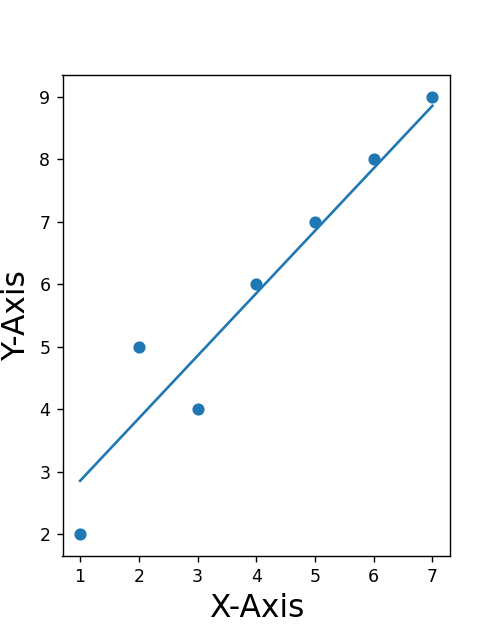

In [5]:
%matplotlib notebook


import time
import matplotlib.pyplot as plt

figure, ax = plt.subplots(figsize=(4,5))

# Data Coordinates

x = [1,2,3,4,5,6,7]
y = [2,5,4,6,7,8,9]

plt.ion()
plot1, = ax.plot(x, y)
ax.scatter(x,y)
# Labels

plt.xlabel("X-Axis",fontsize=18)
plt.ylabel("Y-Axis",fontsize=18)

for value in range(100):
    gd = Gradient_Descent(x,y,value)
    intercept = gd.calculate()
    update_y_value = [i + intercept for i in x]
    
    plot1.set_xdata(x)
    plot1.set_ydata(update_y_value)
    
    figure.canvas.draw()
    figure.canvas.flush_events()
    time.sleep(0.2)


# Display

plt.show()